In [2]:
# Basic libraries for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building (we'll use later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Allow plots to appear in the notebook
%matplotlib inline



In [3]:
# Load the dataset (filename must match exactly what you uploaded)
df = pd.read_csv("winequality.csv")

# Display the first 5 rows
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Column names
print("\nColumns in the dataset:")
print(df.columns)


Shape of dataset: (1599, 12)

Columns in the dataset:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
# Overview of the dataset: datatypes and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
# Check for missing/null values
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,1
density,0
pH,1
sulphates,0


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows found:", duplicates)


Duplicate rows found: 239


In [8]:
# Remove duplicates
df = df.drop_duplicates()
print("New shape after removing duplicates:", df.shape)


New shape after removing duplicates: (1360, 12)


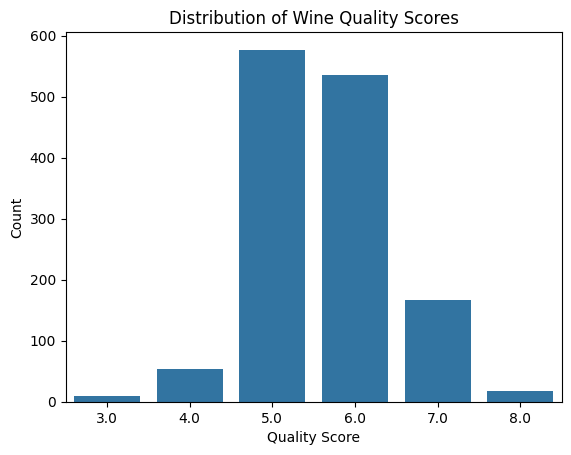

In [9]:
# Count of each wine quality score
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


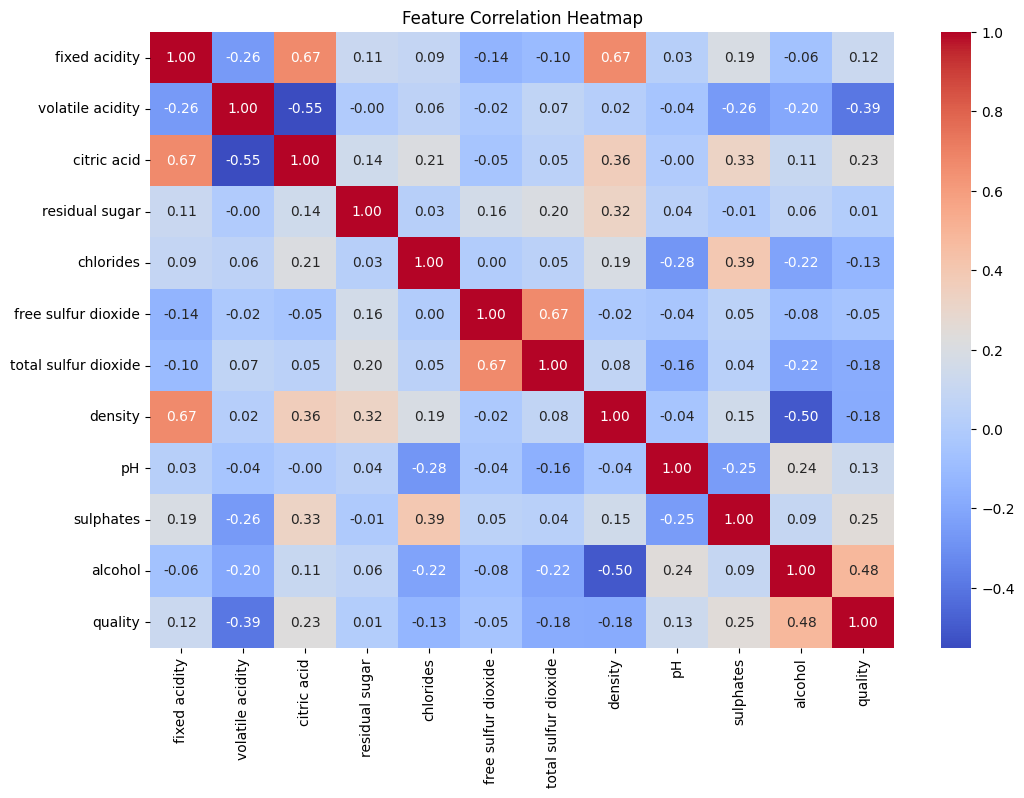

In [10]:
# Correlation matrix
corr = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


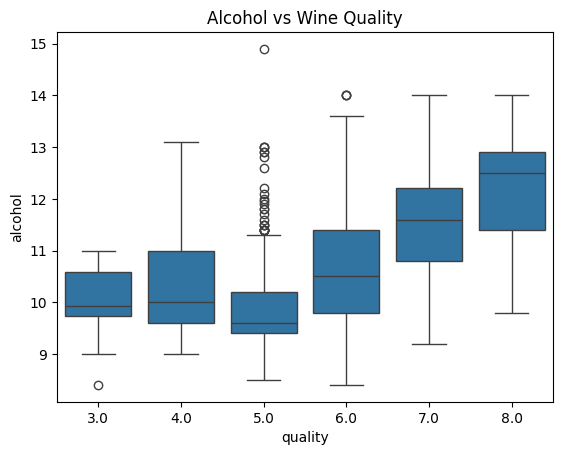

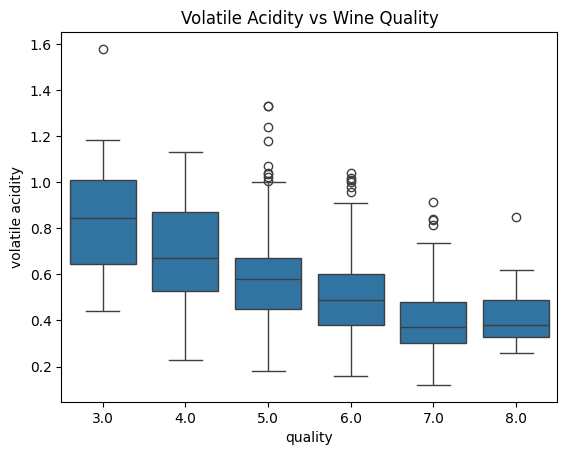

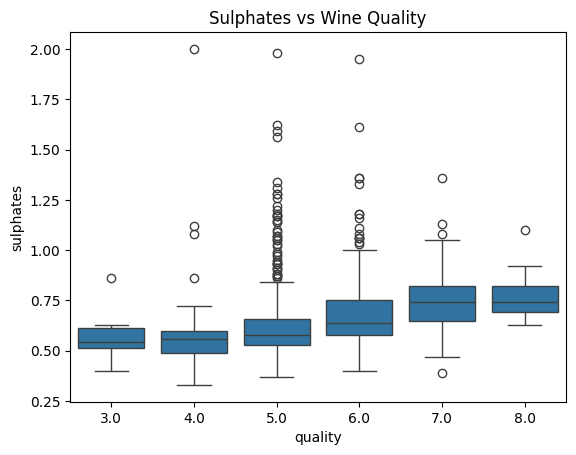

In [11]:
# Alcohol vs Quality
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol vs Wine Quality")
plt.show()

# Volatile Acidity vs Quality
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title("Volatile Acidity vs Wine Quality")
plt.show()

# Sulphates vs Quality
sns.boxplot(x='quality', y='sulphates', data=df)
plt.title("Sulphates vs Wine Quality")
plt.show()


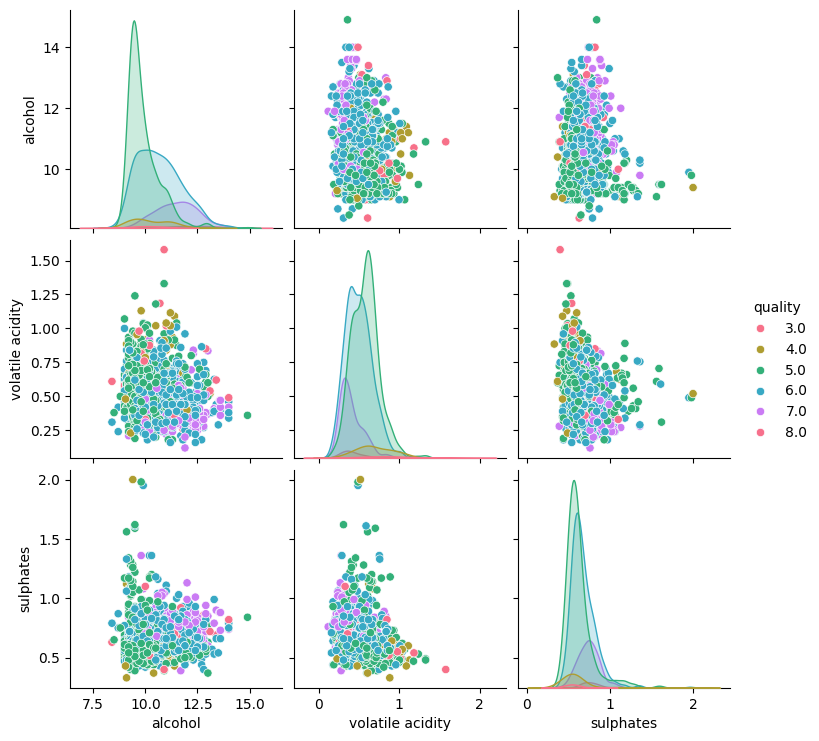

In [12]:
# Plot selected features with quality
sns.pairplot(df[['alcohol', 'volatile acidity', 'sulphates', 'quality']], hue='quality', palette='husl')
plt.show()


quality_label
0    640
1    535
2    185
Name: count, dtype: int64


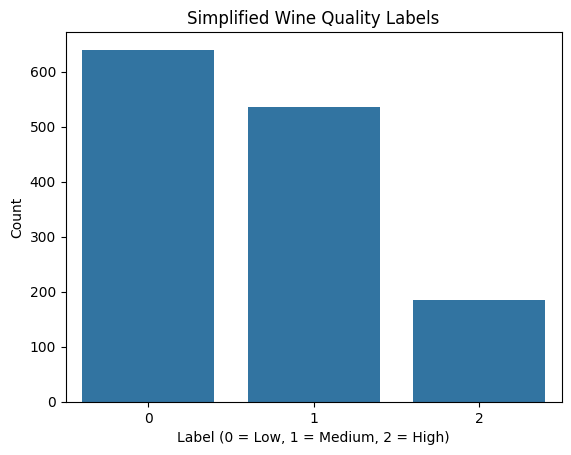

In [13]:
# Convert quality scores into 3 classes: 0 (low), 1 (medium), 2 (high)
def simplify_quality(value):
    if value <= 5:
        return 0
    elif value == 6:
        return 1
    else:
        return 2

df['quality_label'] = df['quality'].apply(simplify_quality)

# Show counts
print(df['quality_label'].value_counts())
sns.countplot(x='quality_label', data=df)
plt.title("Simplified Wine Quality Labels")
plt.xlabel("Label (0 = Low, 1 = Medium, 2 = High)")
plt.ylabel("Count")
plt.show()


In [14]:
# Drop old quality column (not needed anymore)
df = df.drop('quality', axis=1)

# Create input features (X) and target (y)
X = df.drop('quality_label', axis=1)
y = df['quality_label']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1360, 11)
Shape of y: (1360,)


In [15]:
# Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (1088, 11)
Testing set: (272, 11)


In [16]:
# Standardize feature values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Make predictions
y_pred = model.predict(X_test_scaled)


Accuracy: 0.65


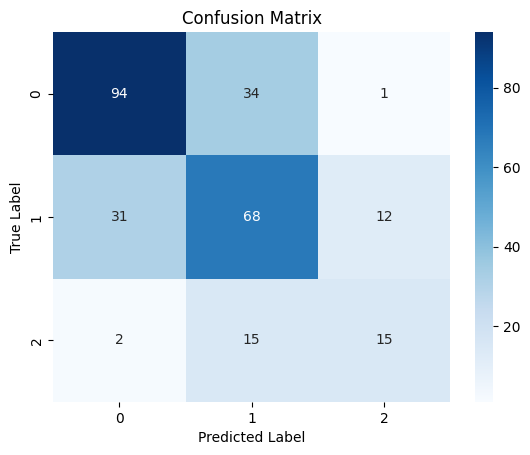

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       129
           1       0.58      0.61      0.60       111
           2       0.54      0.47      0.50        32

    accuracy                           0.65       272
   macro avg       0.62      0.60      0.61       272
weighted avg       0.65      0.65      0.65       272



In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


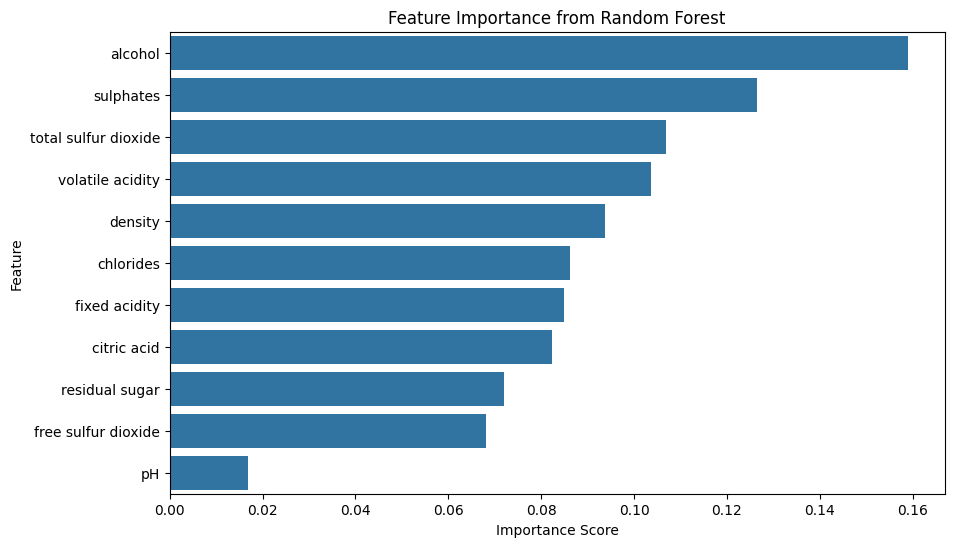

In [20]:
# Plot feature importances
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [21]:
import joblib

# Save the trained model
joblib.dump(model, "wine_quality_model.pkl")

# Save the scaler too (used during prediction)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']